In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('covid_19_clean_complete.csv')

In [3]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


# In Data Analysis what we are going to do is

1. Missing value
2. Explore about numerical variable
3. Explore about catigorical variable
4. Finding relationship between feature


In [4]:
total_data=df.shape[0]
total_data

49068

In [5]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [6]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [8]:
# Finding missing value

df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [9]:
# null value percent in Province/State 


null_value_in_state=df['Province/State'].isnull().sum()
null_value_in_state

34404

In [10]:
percent_of_state_null_value=(null_value_in_state/total_data)*100
percent_of_state_null_value

70.11494252873564

In [11]:
# now we handle null value in state

backfill_method=df['Province/State'].fillna(method='backfill',inplace=True)

In [12]:
df.isnull().sum()

Province/State    7
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [13]:
ffill_method=df['Province/State'].fillna(method='ffill',inplace=True)

In [14]:
df.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [15]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Australian Capital Territory,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Australian Capital Territory,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Australian Capital Territory,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Australian Capital Territory,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Australian Capital Territory,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,Saint Pierre and Miquelon,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Saint Pierre and Miquelon,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Saint Pierre and Miquelon,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Saint Pierre and Miquelon,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [16]:
df.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

<AxesSubplot:>

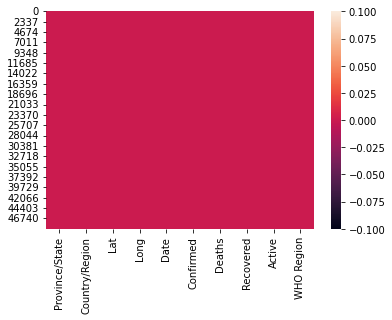

In [17]:
# representing the missing values graphically

sns.heatmap(df.isnull())

In [18]:
df.corr()

,Lat,Long,Confirmed,Deaths,Recovered,Active
Lat,1.000000,-0.127259,0.036665,0.070040,0.015329,0.044392
Long,-0.127259,1.000000,-0.078911,-0.101340,-0.052391,-0.085688
Confirmed,0.036665,-0.078911,1.000000,0.912361,0.895506,0.950255
Deaths,0.070040,-0.101340,0.912361,1.000000,0.763090,0.891858
Recovered,0.015329,-0.052391,0.895506,0.763090,1.000000,0.713088
Active,0.044392,-0.085688,0.950255,0.891858,0.713088,1.000000


<AxesSubplot:>

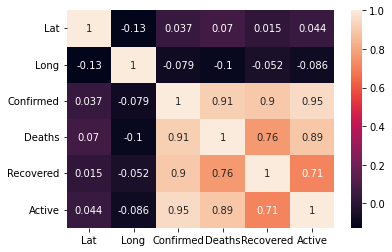

In [19]:
# representing the corelatin graphically

sns.heatmap(df.corr(),annot=True)

In [20]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Australian Capital Territory,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Australian Capital Territory,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Australian Capital Territory,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Australian Capital Territory,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Australian Capital Territory,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [21]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,Saint Pierre and Miquelon,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Saint Pierre and Miquelon,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Saint Pierre and Miquelon,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Saint Pierre and Miquelon,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,Saint Pierre and Miquelon,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [22]:
df.sample()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
33289,Aruba,Kuwait,29.31166,47.481766,2020-05-28,24112,185,8698,15229,Eastern Mediterranean


In [23]:
df['Province/State'].unique()

array(['Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermuda', '

In [24]:
# HOW MANY CASES CONFIRMED,DEATH,RECOVERED,ACTIVE CASE IN INDIA?

In [25]:
df[df['Country/Region']=='India'][['Confirmed','Deaths', 'Recovered', 'Active']].tail(1)

,Confirmed,Deaths,Recovered,Active
48936,1480073,33408,951166,495499


In [26]:
# HOW MANY CASES CONFIRMED,DEATH,RECOVERED,ACTIVE CASE IN FRANCE ?

In [27]:
df[df['Country/Region']=='France'][['Confirmed','Deaths', 'Recovered', 'Active']].tail(1)

,Confirmed,Deaths,Recovered,Active
49060,4,0,1,3


In [28]:
#FIND TOTAL DEATH IN WORLD
total_death=df.Deaths.sum()
total_death

43384903

In [29]:
#TOTAL ACTIVE CASE
total_active_case=df.Active.sum()
total_active_case

396715350

In [30]:
# TOTAL RECOVERD CASE
total_recoverd_case=df.Recovered.sum()
total_recoverd_case

388408229

In [31]:
# TOTAL CONFIRMED CASE
total_confirmed_case=df.Confirmed.sum()
total_confirmed_case

828508482

([<matplotlib.patches.Wedge at 0x2c73508e100>,
 [Text(1.096280873807944, 0.09037834764417466, 'total_deaths'),
  Text(0.6693255479283352, 0.8729280101419784, 'total_active'),
  Text(-0.8149834085704711, 0.738784165879898, 'total_recovered'),
  Text(1.2873679253727042e-08, -1.0999999999999999, 'total_confirmed')],
 [Text(0.5979713857134239, 0.04929728053318617, '2.62'),
  Text(0.3650866625063646, 0.47614255098653363, '23.94'),
  Text(-0.4445364046748024, 0.40297318138903526, '23.44'),
  Text(7.022006865669295e-09, -0.5999999999999999, '50.00')])

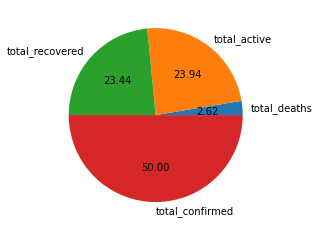

In [32]:
#WHOLE DATA REPRESENTING BY GRAPH
data=[total_death,total_active_case,total_recoverd_case,total_confirmed_case]
mylabels=['total_deaths','total_active','total_recovered','total_confirmed']
plt.pie(data,labels=mylabels,autopct='%.2f')

In [33]:
# WHICH COUNTRY HAS MAX ACTIVE CASE

In [34]:
df[df['Active'].max()==df['Active']][['Country/Region','Active','Date']]

,Country/Region,Active,Date
49030,US,2816444,2020-07-27


In [35]:
# WHICH COUNTRY HAS MIN ACTIVE  CASE

df[df['Active'].min()==df['Active']][['Country/Region','Active','Date']]

,Country/Region,Active,Date
34669,United Kingdom,-14,2020-06-02


In [36]:
#WHICH COUNTRY HAS MAX DEATH
df[df['Deaths'].max()==df['Deaths']][['Country/Region','Deaths','Date']]

,Country/Region,Deaths,Date
49030,US,148011,2020-07-27


In [37]:
# WHICH COUNTRY HAS  MIN DEATH
df[df['Deaths'].min()==df['Deaths']][['Country/Region','Deaths','Date']].head(1)

,Country/Region,Deaths,Date
0,Afghanistan,0,2020-01-22


In [38]:
# WHICH COUNTRY HAS MAX RECOVERED

df[df['Recovered'].max()==df['Recovered']][['Country/Region','Recovered','Date']]

,Country/Region,Recovered,Date
48835,Brazil,1846641,2020-07-27


In [39]:
# WHICH COUNTRY HAS MIN RECOVERD
df[df['Recovered'].min()==df['Recovered']][['Country/Region','Recovered']].head(1)

,Country/Region,Recovered
0,Afghanistan,0


In [40]:
# FIND TOTAL ACTIVE CASE IN ALL WHO REGION

df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [41]:
# ACTIVE CASE IN EUROPE

df.loc[df['WHO Region']=='Europe']['Active'].sum()

106406678

In [42]:
# ACTIVE CASE IN  EASTERN  MEDITERRANEAN

df.loc[df['WHO Region']=='Eastern Mediterranean']['Active'].sum()

24108160

In [43]:
# ACTIVE CASE IN AFRICA

df.loc[df['WHO Region']=='Africa']['Active'].sum()

10158119

In [44]:
# ACTIVE CASE IN AMERICAS

df.loc[df['WHO Region']=='Americas']['Active'].sum()

225832458

In [45]:
# ACTIVE CASE IN WESTERN PACIFIC

df.loc[df['WHO Region']=='Western Pacific']['Active'].sum()
#ACTIVE CASE IN SOUTH EAST  ASIA


6580031

In [46]:
#ACTIVE CASE IN SOUTH EAST  ASIA

df.loc[df['WHO Region']=='South-East Asia']['Active'].sum()


23629904

In [47]:
#REPRESINTING THE GRAPH 

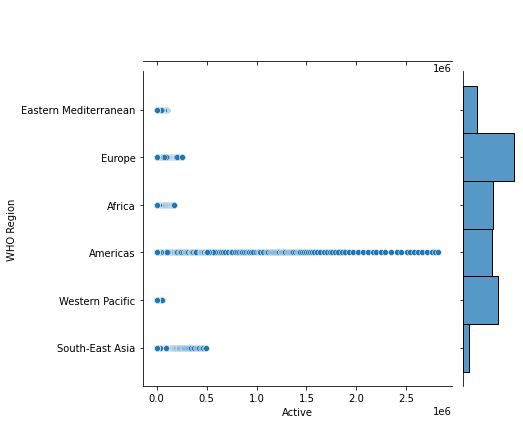

In [48]:
sns.jointplot(x="Active",y="WHO Region", data=df )

In [49]:
# FIND TOTAL DEATH IN ALL WHO REGION

# South-East Asia' region
df.loc[df['WHO Region']=='South-East Asia']['Deaths'].sum()

1458134

In [50]:
#western pacific region

df.loc[df['WHO Region']=='Western Pacific']['Deaths'].sum()

932430

In [51]:
# american region

df.loc[df['WHO Region']=='Americas']['Deaths'].sum()

19359292

In [52]:
#africa reguion

df.loc[df['WHO Region']=='Africa']['Deaths'].sum()

439978

In [53]:
# Eastern Mediterranean  region

df.loc[df['WHO Region']=='Eastern Mediterranean']['Deaths'].sum()

1924029

In [54]:
#REPRESINTINH THE GRAPH-----

<AxesSubplot:xlabel='WHO Region', ylabel='Deaths'>

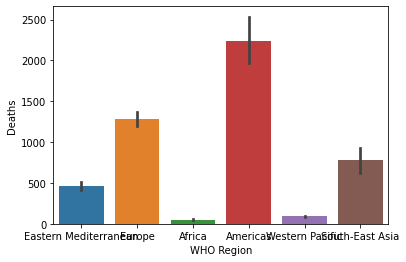

In [55]:
sns.barplot(x='WHO Region',y='Deaths',data=df)

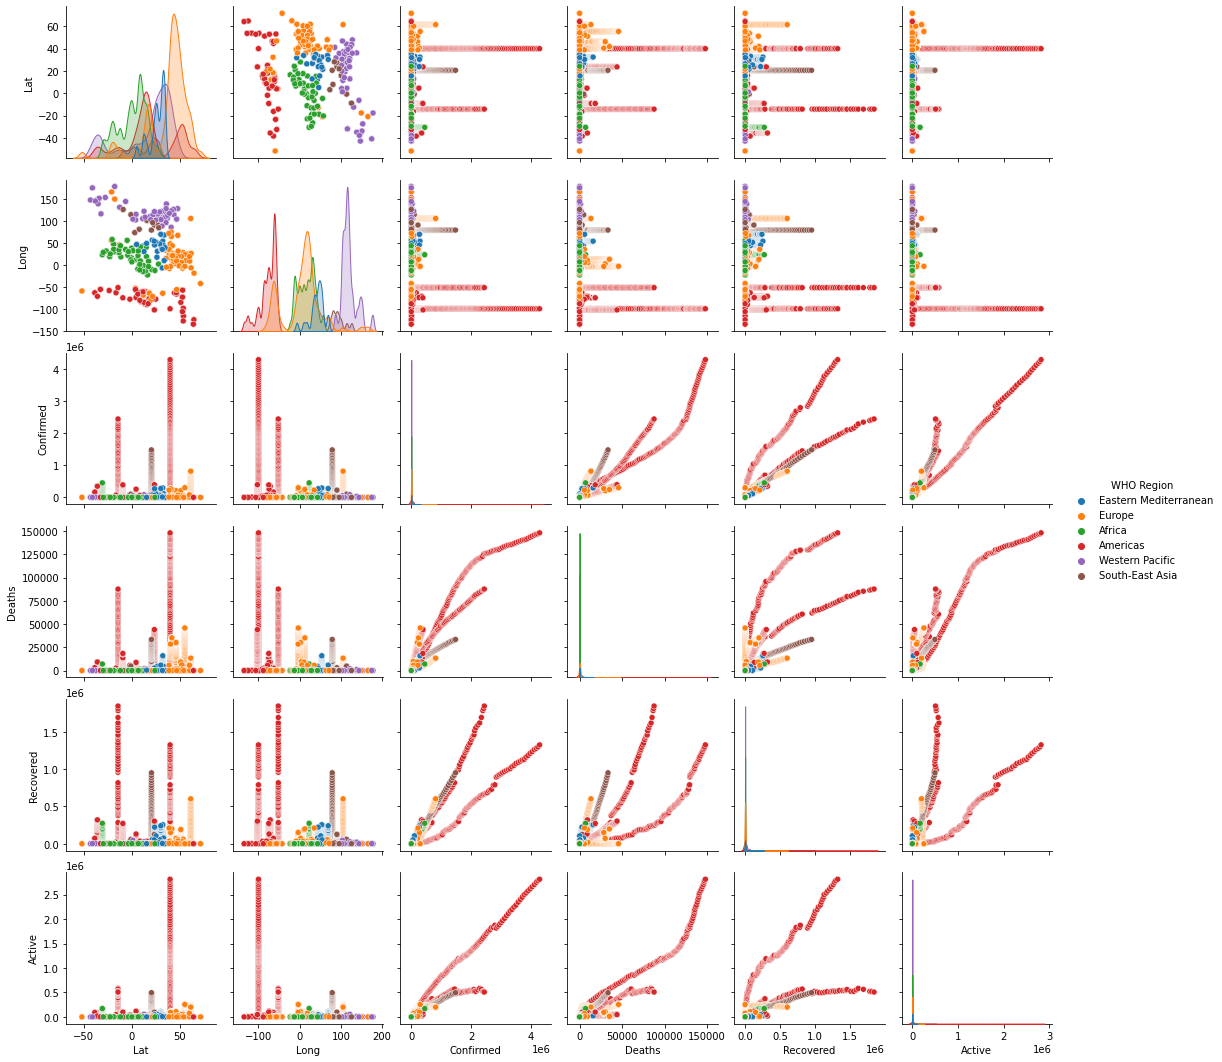

In [56]:
# SHOW WHO REGION  DATA BY VIZ 

sns.pairplot(df,hue='WHO Region')

<AxesSubplot:xlabel='Confirmed', ylabel='WHO Region'>

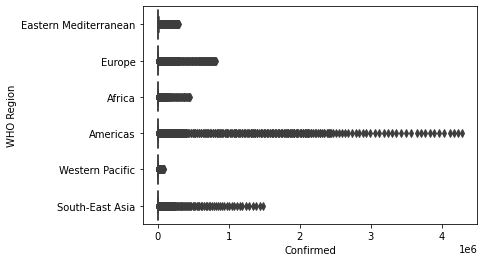

In [57]:
#TOTAL CONFIRMED  CASE  WHO REASON WISE

sns.boxplot(x='Confirmed',y='WHO Region',data=df)

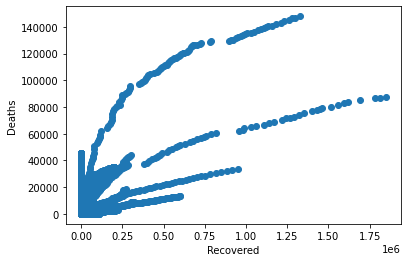

In [58]:
#FIND THE  GRAPH B/W TOTAL RECOVERED AND DEATHS
total_recovered=df['Recovered']
total_death=df['Deaths']
plt.xlabel('Recovered')
plt.ylabel('Deaths')
plt.scatter(total_recovered,total_death)

In [59]:
# WHICH COUNTRY HAS LONGEST LATITUDE

df[df['Lat']==df.Lat.max()]['Country/Region'].head(1)

91    Greenland
Name: Country/Region, dtype: object

In [60]:
# WHICH COUNTRY HAS SMALLEST lATITUDE

df[df['Lat']==df.Lat.min()]['Country/Region'].head(1)

252    United Kingdom
Name: Country/Region, dtype: object

In [61]:
# WHICH COUNTRY HAS LONGEST LONGITUDE

df[df['Long']==df.Long.max()]['Country/Region'].head(1)

103    Fiji
Name: Country/Region, dtype: object

In [62]:
# WHICH COUNTRY HAS SMALLEST LONGITUDE

df[df['Long']==df.Long.min()]['Country/Region'].head(1)

242    Canada
Name: Country/Region, dtype: object

In [63]:
# FIND THE TOTAL LATITUDE WHO REGION 

europe_lat=df[df['WHO Region']=='Europe']['Lat'].sum()

In [64]:
eastern_mediterranean_lat=df[df['WHO Region']=='Eastern Mediterranean']['Lat'].sum()

In [65]:
africa_lat=df[df['WHO Region']=='Africa']['Lat'].sum()

In [66]:
western_pacific_lat=df[df['WHO Region']=='Western Pacific']['Lat'].sum()

In [67]:
americas_lat=df[df['WHO Region']=='Americas']['Lat'].sum()

In [68]:
south_east_asia=df[df['WHO Region']=='South-East Asia']['Lat'].sum()

([<matplotlib.patches.Wedge at 0x2c704d89a30>,
 [Text(-0.13807180012833725, 1.0913002235907956, 'Europe'),
  Text(-0.9231561287265814, -0.5981494478761574, 'Eastern Mediterranean'),
  Text(-0.6731483501689755, -0.8699835048233884, 'Africa'),
  Text(-0.10665543149785849, -1.0948171623298595, 'Western Pacific'),
  Text(0.8833189779783555, -0.6555513581278538, 'Americas'),
  Text(1.0966427832083534, -0.08587552641490362, 'South-East Asia')],
 [Text(-0.07531189097909304, 0.5952546674131612, '54.01'),
  Text(-0.5035397065781352, -0.32626333520517675, '10.29'),
  Text(-0.3671718273648957, -0.4745364571763936, '0.45'),
  Text(-0.0581756899079228, -0.5971729976344687, '17.42'),
  Text(0.4818103516245575, -0.35757346806973844, '15.35'),
  Text(0.5981687908409199, -0.04684119622631106, '2.49')])

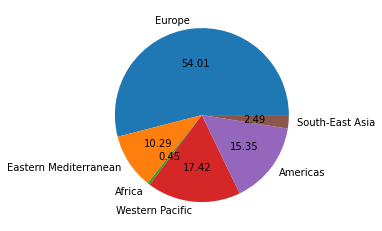

In [69]:
data=[europe_lat,eastern_mediterranean_lat,africa_lat,western_pacific_lat,americas_lat,south_east_asia]
mylabels=['Europe','Eastern Mediterranean','Africa','Western Pacific','Americas','South-East Asia']
plt.pie(data,labels=mylabels,autopct='%.2f')

<BarContainer object of 6 artists>

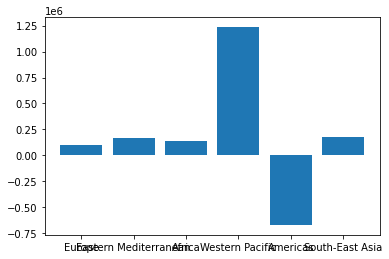

In [70]:
# FIND THE TOTAL LOMGITUDE OF WHO REGION

europe_long=df[df['WHO Region']=='Europe']['Long'].sum()
eastern_mediterranean_long=df[df['WHO Region']=='Eastern Mediterranean']['Long'].sum()
africa_long=df[df['WHO Region']=='Africa']['Long'].sum()
western_pacific_long=df[df['WHO Region']=='Western Pacific']['Long'].sum()
americas_long=df[df['WHO Region']=='Americas']['Long'].sum()
south_east_asia_long=df[df['WHO Region']=='South-East Asia']['Long'].sum()

data=[europe_long,eastern_mediterranean_long,africa_long,western_pacific_long,americas_long,south_east_asia_long]
data2=['Europe','Eastern Mediterranean','Africa','Western Pacific','Americas','South-East Asia']
plt.bar(data2,data)

([<matplotlib.patches.Wedge at 0x2c704e59dc0>,
 [Text(0.597563966171271, 0.9235352220319809, 'Europe'),
  Text(-0.7973723196718563, 0.7577581301583792, 'Eastern Mediterranean'),
  Text(-1.0569360296746966, 0.30477242194051807, 'Africa'),
  Text(-0.518231178146583, -0.97027647915262, 'Western Pacific'),
  Text(0.8833841273759503, -0.6554635638235211, 'Americas'),
  Text(1.0677098719875333, -0.2645668710560059, 'South-East Asia')],
 [Text(0.325943981547966, 0.5037464847447168, '31.72'),
  Text(-0.4349303561846488, 0.413322616450025, '12.37'),
  Text(-0.5765105616407434, 0.16623950287664618, '2.88'),
  Text(-0.28267155171631797, -0.5292417159014291, '40.44'),
  Text(0.4818458876596092, -0.3575255802673751, '4.86'),
  Text(0.5823872029022908, -0.14430920239418502, '7.73')])

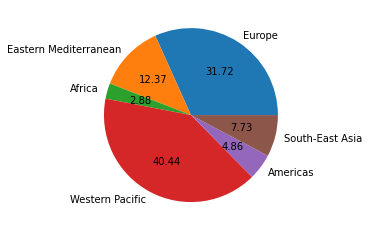

In [71]:
# FIND RECOVERED CASE IN WHO REGION WISE

europe_recover=df.loc[df['WHO Region']=='Europe']['Recovered'].sum()
eastern_mediterranean_recover=df.loc[df['WHO Region']=='Eastern Mediterranean']['Recovered'].sum()
africa_recover=df.loc[df['WHO Region']=='Africa']['Recovered'].sum()
americas_recover=df.loc[df['WHO Region']=='Americas']['Recovered'].sum()
western_pacific_recover=df.loc[df['WHO Region']=='Western Pacific']['Recovered'].sum()
south_east_asia=df.loc[df['WHO Region']=='South-East Asia']['Recovered'].sum()
data=(europe_recover,eastern_mediterranean_recover,africa_recover,americas_recover,western_pacific_recover,south_east_asia)
mylabels=['Europe','Eastern Mediterranean','Africa','Western Pacific','Americas','South-East Asia']
plt.pie(data,labels=mylabels,autopct='%.2f')

<BarContainer object of 6 artists>

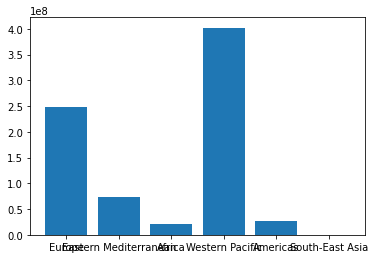

In [82]:
# FIND CONFIRMED CASE IN WHO REGION WISE.

europe_confirm=df.loc[df['WHO Region']=='Europe']['Confirmed'].sum()
easter_confirm=df.loc[df['WHO Region']=='Eastern Mediterranean']['Confirmed'].sum()
africa_confirm=df.loc[df['WHO Region']=='Africa']['Confirmed'].sum()
south_est_asia=df.loc[df['WHO Region']== 'East Asia']['Confirmed'].sum()
america_confirm=df.loc[df['WHO Region']=='Americas']['Confirmed'].sum()
western_confirm=df.loc[df['WHO Region']=='Western Pacific']['Confirmed'].sum()

data=(europe_confirm,easter_confirm,africa_confirm,america_confirm,western_confirm,south_est_asia)
data2=('Europe','Eastern Mediterranean','Africa','Western Pacific','Americas','South-East Asia')
plt.xlabel=['WHO REGION']
plt.ylabel=['CONFIRMED CASES']
plt.bar(data2,data)

<AxesSubplot:xlabel='WHO Region', ylabel='Count'>

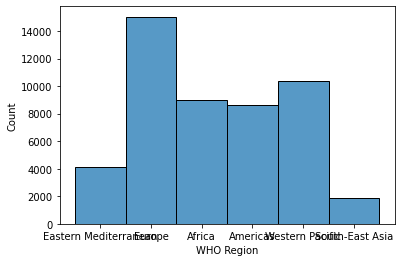

In [83]:
# SHOW WHO REGION BY HISTOGRAM
sns.histplot(df['WHO Region'])